Не говорю что прямо понял, но понял что это было значительно проще...

In [3]:
!pip install pydub
!pip install sounddevice

     ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
     -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
     -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
     -- ------------------------------------- 10.2/199.7 kB ? eta -:--:--
     ----- ------------------------------- 30.7/199.7 kB 131.3 kB/s eta 0:00:02
     ----- ------------------------------- 30.7/199.7 kB 131.3 kB/s eta 0:00:02
     ----------- ------------------------- 61.4/199.7 kB 192.5 kB/s eta 0:00:01
     ------------- ----------------------- 71.7/199.7 kB 206.9 kB/s eta 0:00:01
     -------------------- --------------- 112.6/199.7 kB 284.4 kB/s eta 0:00:01
     ------------------------- ---------- 143.4/199.7 kB 327.9 kB/s eta 0:00:01
     --------------------------- -------- 153.6/199.7 kB 327.3 kB/s eta 0:00:01
     ------------------------------- ---- 174.1/199.7 kB 349.3 kB/s eta 0:00:01
     -----------------------------------  194.6/199.7 kB 357.2 kB

In [5]:
!pip install librosa

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.0 MB 297.7 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.0 MB 353.1 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.0 MB 350.1 kB/s eta 0:00:03
     ---- ----------------------------------- 0.1/1.0 MB 344.8 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.0 MB 427.9 kB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.0 MB 427.9 kB/s eta 0:00:02
     ------- -------------------------------- 0.2/1.0 MB 420.8 kB/s eta 0:00:02
     -------- ------------------------------- 0.2/1.0 MB 430.1 kB/s eta 0:00:02
     ---------- ----------------------------- 0.3/1.0 MB 462.8 kB/s eta 0:00

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
from pydub.playback import play #?????
import scipy

In [26]:
f = 'Guitar Chord Jazz CMaj9.wav'
samplerate, data = wavfile.read(f)

C:\Users\vegam\AppData\Local\Temp\ipykernel_10124\2286229142.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(f)


In [27]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate)
adata = data[:,0]

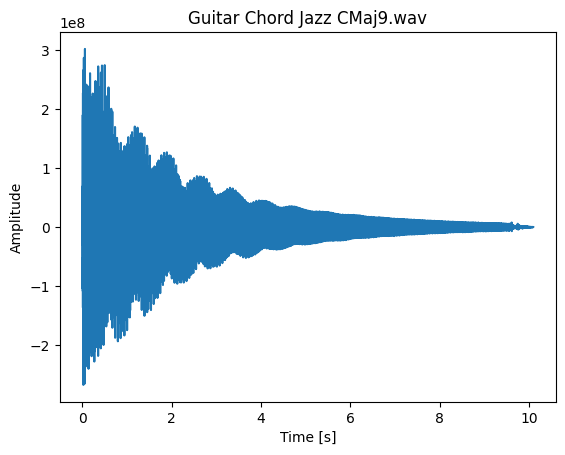

In [28]:
plt.plot(time, adata)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Guitar Chord Jazz CMaj9.wav')
plt.show()

In [53]:
sound = AudioSegment.from_wav('Guitar Chord Jazz CMaj9.wav')
play(sound)
# Оно не играется, беды с ffplay, не знаю

c:\Users\vegam\Documents\Для ML\.venv\Lib\site-packages\pydub\utils.py:184: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\vegam\\AppData\\Local\\Temp\\tmpwtnr51vf.wav'

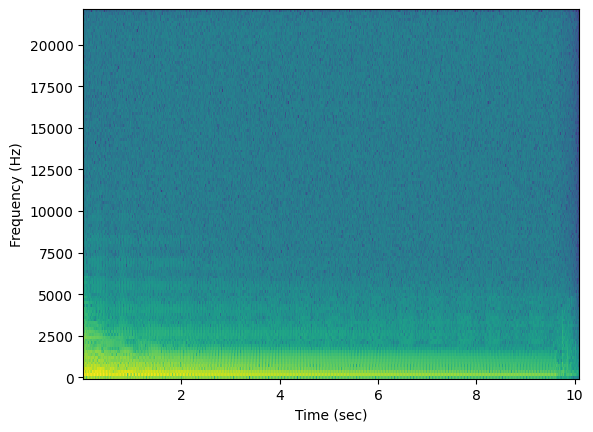

In [48]:
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()


In [30]:
def freq_to_mel(freq):
    return 1125.0 * np.log(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (np.exp(mels / 1125.0) - 1.0)

In [31]:
def get_filter_points(fmin, fmax, mel_filter_count, data_size, sample_rate=44100):
    
    mels = np.linspace(freq_to_mel(fmin), freq_to_mel(fmax), num=mel_filter_count+2)
    freqs = met_to_freq(mels)
    
    return np.floor((data_size + 1) / sample_rate * freqs).astype(int), freqs

In [32]:
print(len(data))

445280


In [33]:
def hm(f, k, m):
    if k < f[m - 1]:
        return 0
    elif f[m - 1] <= k and k < f[m]:
        return (k - f[m - 1]) / (f[m] - f[m - 1])
    elif f[m] <= k and k <= f[m + 1]:
        return (k - f[m]) / (f[m + 1] - f[m])
    return 0

In [34]:
min_freq = 0
max_freq = samplerate / 2
mel_filter_count = 20

In [35]:
points,freqs = get_filter_points(min_freq, max_freq, mel_filter_count, len(data), samplerate)
print(points)

[     0   1274   2778   4553   6649   9122  12042  15487  19554  24354
  30020  36707  44600  53916  64912  77891  93209 111290 132631 157819
 187549 222640]


In [36]:
print(hm(points, 10000, 3))

0


In [37]:
ft_data = scipy.fft.fft(adata)

c:\Users\vegam\Documents\Для ML\.venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\vegam\Documents\Для ML\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


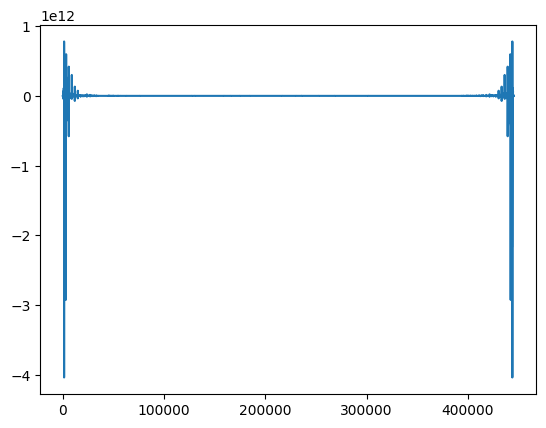

In [38]:
plt.plot(ft_data)

In [39]:
s = []
for m in range(1, mel_filter_count + 1):
    summ = 0
    for k in range(len(ft_data) - 1):
        summ += np.abs(ft_data[k])**2 * hm(points, k, m)
    s.append(np.log(summ))
print(s)

[58.46177754404157, 58.62200057848062, 57.25058982716624, 56.486129968374435, 55.18791392901163, 54.21076660366811, 52.943044023633796, 51.581845789703316, 51.62064790891258, 50.262522914501425, 47.949470815492255, 46.137951930354454, 44.64425232476149, 43.283920862593284, 42.62833245374798, 42.67203335776079, 42.735376031266505, 42.89865176390854, 43.115117809395, 43.27803873767844]


In [40]:
cn = []
print()
for n in range(mel_filter_count):
    summ = 0
    for m in range(mel_filter_count):
        summ += s[m] * np.cos(np.pi * n * (m + 1 / 2) / mel_filter_count)
    cn.append(summ)


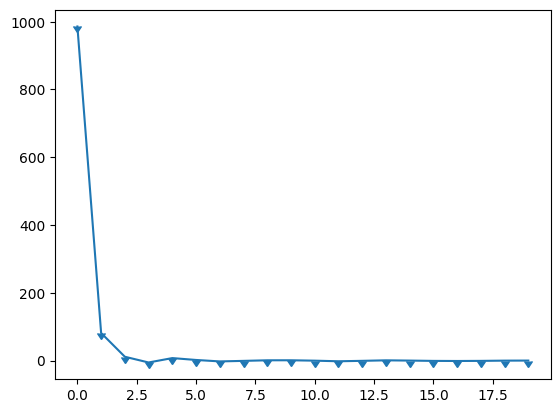

In [41]:
plt.plot(cn,marker=matplotlib.markers.CARETDOWNBASE)

In [42]:
import librosa

In [43]:
mfccs = librosa.feature.mfcc(y = adata.astype(float), sr = samplerate, n_mfcc = 10)

In [44]:
print(len(mfccs))

10
